In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('testing.csv')

In [3]:
df_train.head()

,age,workclass,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


Question 2.2.1

In [4]:
#Splitting the data into training data and labels.
df_y = df_train['<=50k']
df_train.drop('<=50k',axis=1,inplace=True)
df_y_test = df_test['<=50k']
df_test.drop('<=50k',axis=1,inplace=True)

In [5]:
#Replacing the classification <=50K as -1 and >50K as +1
df_y=df_y.replace({' <=50K':-1,' >50K':1})
df_y_test=df_y_test.replace({' <=50K.':-1,' >50K.':1})

In [6]:
y_train = np.array(df_y)
y_test = np.array(df_y_test)

In [7]:
#found using features.txt
categorical=['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'native-country']
numerical=['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [8]:
#Replacing ? with the mode
columns=[]
for col in df_train.columns:
    if col in categorical:
        columns.append(col)
        mode = df_train[col].mode()[0]
        df_train[col].replace({' ?':mode},inplace=True)
        df_test[col].replace({' ?':mode},inplace=True)
    if col in numerical:
        median = df_train[col].median()
        dtype = df_train[col].dtype 
        df_train[col]=df_train[col].astype('O')
        df_test[col]=df_test[col].astype('O')
        df_train[col].replace({' ?':np.nan},inplace=True)
        df_test[col].replace({' ?':np.nan},inplace=True)
        df_train[col].replace({np.nan:median},inplace=True)
        df_test[col].replace({np.nan:median},inplace=True)
        df_train[col]=df_train[col].astype(dtype)
        df_test[col]=df_test[col].astype(dtype)

In [15]:
df_train

,age,workclass,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States


Question 2.2.2

In [18]:
#Doing one hot encoding
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [19]:
df_train.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,2174,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_test.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,7688,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,0,0,30,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
# FInding out the missing columns in the test set which are not present in
# the training set and putting them in order in the test design matrix with 0's
missing_cols = set( df_train.columns ) - set( df_test.columns )
for c in missing_cols:
    df_test[c] = 0
df_test = df_test[df_train.columns]

In [13]:
# Creating training and test design matrix
X = np.array(df_train)
X_test = np.array(df_test)

Question 2.2.3

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val =train_test_split(X, y_train, test_size=0.3, random_state=7)

Question 2.2.4

In [15]:
max_depth = np.arange(1,31,1)
min_sample_leaf = np.arange(1,51,1)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
error_training=[]
error_val=[]
for depth in max_depth:
    error1=[]
    error2=[]
    for leaf in min_sample_leaf:
        cf = DecisionTreeClassifier(max_depth=depth,min_samples_leaf=leaf)
        cf.fit(X_train,y_train)
        yhat1 = cf.predict(X_train)
        yhat2 = cf.predict(X_val)
        e1 = np.mean(yhat1!=y_train)
        e2 = np.mean(yhat2!=y_val)
        error1.append(e1)
        error2.append(e2)
    error_training.append(error1)
    error_val.append((error2))
        
        

In [18]:
e_train = np.array(error_training)
e_val = np.array(error_val)

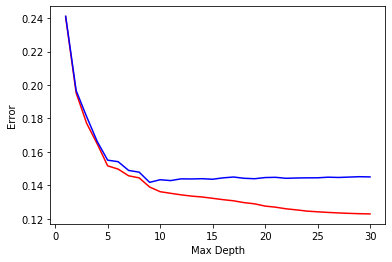

In [20]:
import matplotlib.pyplot as plt
plt.xlabel("Max Depth")
plt.ylabel("Error")
plt.plot(max_depth,np.mean(e_train,axis=1),color='r')
plt.plot(max_depth,np.mean(e_val,axis=1),color='b')
plt.show()

RED - TRAINING
BLUE - VALIDATION

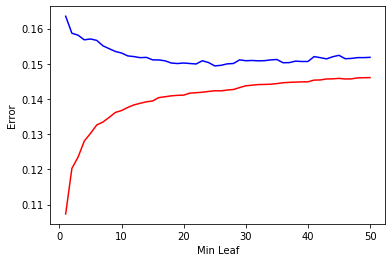

In [21]:
import matplotlib.pyplot as plt
plt.xlabel("Min Leaf")
plt.ylabel("Error")
plt.plot(min_sample_leaf,np.mean(e_train,axis=0),color='r')
plt.plot(min_sample_leaf,np.mean(e_val,axis=0),color='b')
plt.show()

RED - TRAINING
BLUE - VALIDATION

In [22]:
(max_depth_best,min_samples_leaf_best)=np.where(error_val==np.min(error_val))
print("Best depth of tree " + str(max_depth[max_depth_best[0]]))
print("Best min leaves of tree " + str(min_sample_leaf[min_samples_leaf_best[0]]))

Best depth of tree 27
Best min leaves of tree 21


In [23]:
best_depth = max_depth[max_depth_best[0]]
best_leaf=min_sample_leaf[min_samples_leaf_best[0]]
clf = DecisionTreeClassifier(max_depth=best_depth,min_samples_leaf=best_leaf)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=27,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=21, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

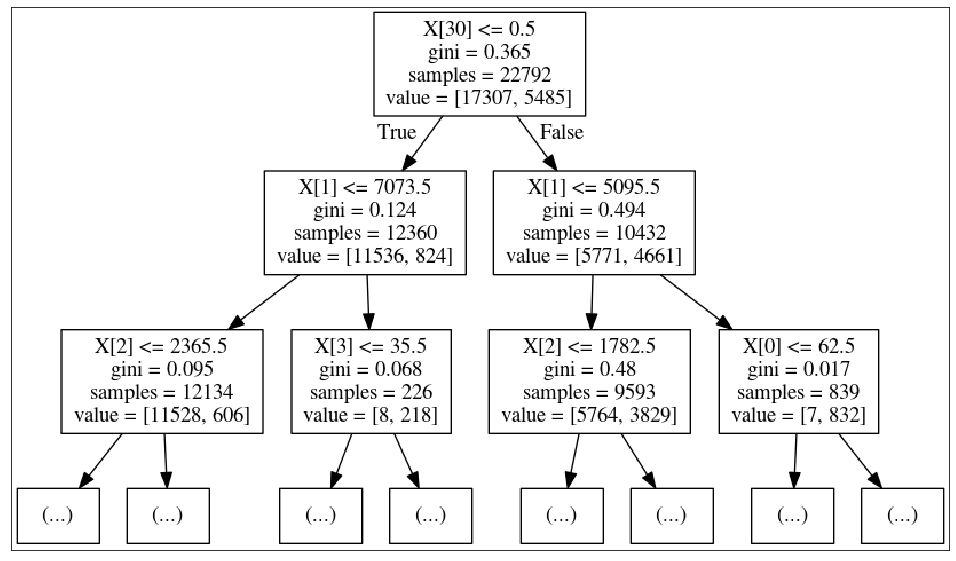

In [24]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image  
tree = export_graphviz(clf,max_depth=2,out_file='tree.dot')
(graph,) = pydot.graph_from_dot_file('tree.dot')  
graph.write_png('tree.png')
plt.figure(figsize=(100,10))
plt.xticks([])
plt.yticks([])
tree_image = plt.imread('tree.png')
plt.imshow(tree_image)
plt.show()

Question 2.2.5

In [39]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = np.arange(1,51,1)
e1_t=[]
e1_v=[]
e2_t=[]
e2_v=[]
for val in n_estimators:
    clf = RandomForestClassifier(n_estimators=val)
    clf2 = RandomForestClassifier(n_estimators=val,max_depth=best_depth,min_samples_leaf=best_leaf)
    clf.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    yhat1 = clf.predict(X_train)
    yhat2 = clf.predict(X_val)
    yhat3 = clf2.predict(X_train)
    yhat4 = clf2.predict(X_val)
    e1_t.append(np.mean(yhat1!=y_train))
    e1_v.append(np.mean(yhat2!=y_val))
    e2_t.append(np.mean(yhat3!=y_train))
    e2_v.append(np.mean(yhat4!=y_val))
    

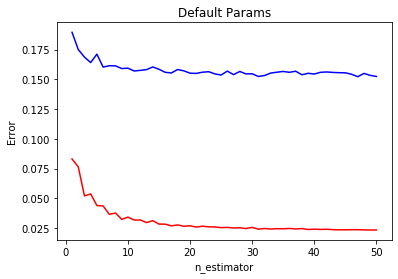

In [40]:
plt.xlabel("n_estimator")
plt.ylabel("Error")
plt.title("Default Params")
plt.plot(n_estimators,e1_t,color='r')
plt.plot(n_estimators,e1_v,color='b')
plt.show()

RED - TRAINING
BLUE - VALIDATION

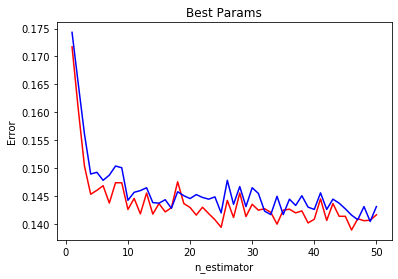

In [41]:
plt.xlabel("n_estimator")
plt.ylabel("Error")
plt.title("Best Params")
plt.plot(n_estimators,e2_t,color='r')
plt.plot(n_estimators,e2_v,color='b')
plt.show()

RED - TRAINING
BLUE - VALIDATION

In [42]:
best_estimator = n_estimators[np.argmin(e2_v)]
print("Best estimator value is " + str(best_estimator))

Best estimator value is 49


Question 2.2.6

In [43]:
clf_decision = DecisionTreeClassifier(max_depth=best_depth,min_samples_leaf=best_leaf)
clf_random = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,min_samples_leaf=best_leaf)


In [44]:
y = np.array(df_y)
clf_decision.fit(X,y)
clf_random.fit(X,y)
yhat_decision=clf_decision.predict(X_test)
yhat_random=clf_random.predict(X_test)

In [45]:
print("Error rate for decision trees "+str(np.mean(yhat_decision!=y_test)))
print("Error rate for Random Forest "+str(np.mean(yhat_random!=y_test)))

Error rate for decision trees 0.14452429211964868
Error rate for Random Forest 0.14016338062772557


Random Forest gives a better performance over decision trees